# Employee Attrition Classification 

*The dataset for this project originates from the [Synthetic Employee Attrition Dataset](https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset/data)*
<br>

## Context

The **Synthetic Employee Attrition Dataset** is a simulated dataset designed for the analysis and prediction of employee attrition. It contains detailed information about various aspects of an employee's profile, including demographics, job-related features, and personal circumstances.

This dataset is ideal for HR analytics, machine learning model development, and demonstrating advanced data analysis techniques. It provides a comprehensive and realistic view of the factors affecting employee retention, making it a valuable resource for researchers and practitioners in the field of human resources and organizational development.


## Problem Statement:
The goal is to understand the factors contributing to attrition and develop predictive models to identify at-risk employees.


## Attribute Information
The dataset comprises **74,498 samples**, split into training and testing sets to facilitate model development and evaluation. Each record includes a unique Employee ID and features that influence employee attrition.


#### Input variables:

1) **Employee ID**: A unique identifier assigned to each employee.

2) **Age**: The age of the employee, ranging from 18 to 60 years.

3) **Gender**: The gender of the employee

4) **Years at Company**: The number of years the employee has been working at the company.

5) **Monthly Income**: The monthly salary of the employee, in dollars.

6) **Job Role**: The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.

7) **Work-Life Balance**: The employee's perceived balance between work and personal life, (Poor, Below Average, Good, Excellent)

8) **Job Satisfaction**: The employee's satisfaction with their job: (Very Low, Low, Medium, High)

9) **Performance Rating**: The employee's performance rating: (Low, Below Average, Average, High)

10) **Number of Promotions**: The total number of promotions the employee has received.

11) **Distance from Home**: The distance between the employee's home and workplace, in miles.

12) **Education Level**: The highest education level attained by the employee: (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD)

13) **Marital Status**: The marital status of the employee: (Divorced, Married, Single)

14) **Job Level**: The job level of the employee: (Entry, Mid, Senior)

15) **Company Size**: The size of the company the employee works for: (Small,Medium,Large)

16) **Company Tenure**: The total number of years the employee has been working in the industry.

17) **Remote Work:** Whether the employee works remotely: (Yes or No)

18) **Leadership Opportunities**: Whether the employee has leadership opportunities: (Yes or No)

19) **Innovation Opportunities**: Whether the employee has opportunities for innovation: (Yes or No)

20) **Company Reputation**: The employee's perception of the company's reputation: (Very Poor, Poor,Good, Excellent)

21) **Employee Recognition**: The level of recognition the employee receives:(Very Low, Low, Medium, High)

#### Output variable (desired target):
22) **Attrition**: Whether the employee has left the company, encoded as 0 (stayed) and 1 (Left).


<a id ='toc'></a>
# Table of Contents

1. **[Environment Setup](#environment_setup)**
    - 1.1 - **[Install Package](#install_packages)**
    - 1.2 - **[Load Dependencies](#import_packages)**
2. **[Load dataset](#load_data)**
3. **[Data Types and Dimensions](#Data_Types)**
4. **[Data Preprocessing](#data_preprocessing)**
    - 4.1 - [Data Cleaning](#data_cleaning)
    - 4.2 - [Exploratory Analysis](#exploratory_analysis)
        - 4.2.1 - [Numeric features](#numerical_features)
        - 4.2.2 - [Categorical features](#categorical_features)
        - 4.2.3 - [Analysis report](#report)
    - 4.3 - [Data Transformation](#data_transformation) 
        - 4.3.1 - [Split the dataset](#split_the_dataset)
        - 4.3.2 - [Normalization](#normalization)
5. **[Model Development](#model_development)**
    - 5.1 - [Random Forest](#random_forest)
    - 5.2 - [Logistic Regression](#Logistic)
    - 5.3 - [Ada Boosting](#ADA)
6. **[Model Comparision](#model_cmp)**  
7. **[Conclusion](#conclusion)**

<a id ='environment_setup'></a>
## 1. Environment Setup

[goto toc](#toc)

<a id ='install_packages'></a>
### 1.1. Install Packages

Install required packages

[goto toc](#toc)

In [ ]:
# Install pandas
! pip install pandas

# Install matplotlib
! pip install matplotlib

# Install seaborn
! pip install seaborn 

# Install sklearn
! pip install sklearn


<a id ='import_packages'></a>
### 1.2. Load Dependencies

Import required packages

[goto toc](#toc)

In [29]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Import the required function for preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Import train and test split function
from sklearn.model_selection import train_test_split

# Import Classifiers to be used

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Import packages to calculate performance of the models

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score

# To save the model import pickle 
import pickle

<a id ='load_data'></a>
## 2. Load dataset

Read data from mobile_price.csv file using pandas method read_csv().

[goto toc](#toc)

In [30]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<a id ='Data_Types'></a>
## 3. Data Types and Dimensions

[goto toc](#toc)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [31]:
emp_data = pd.concat([train, test], ignore_index=True)
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

In [32]:
data=emp_data.copy()

In [6]:
data.describe(include='all')

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74498.000000,74498.000000,74498,74498.000000,74498,74498.000000,74498,74498,74498,74498.000000,...,74498.000000,74498,74498,74498.000000,74498,74498,74498,74498,74498,74498
unique,NaN,NaN,2,NaN,5,NaN,4,4,4,NaN,...,NaN,3,3,NaN,2,2,2,4,4,2
top,NaN,NaN,Male,NaN,Technology,NaN,Good,High,Average,NaN,...,NaN,Entry,Medium,NaN,No,No,No,Good,Low,Stayed
freq,NaN,NaN,40826,NaN,19322,NaN,28158,37245,44719,NaN,...,NaN,29780,37231,NaN,60300,70845,62394,37182,29620,39128
mean,37249.500000,38.529746,NaN,15.721603,NaN,7299.379514,NaN,NaN,NaN,0.832935,...,1.650326,NaN,NaN,55.727456,NaN,NaN,NaN,NaN,NaN,NaN
std,21505.864514,12.083456,NaN,11.223744,NaN,2152.508566,NaN,NaN,NaN,0.995289,...,1.553633,NaN,NaN,25.399349,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,1.000000,NaN,1226.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18625.250000,28.000000,NaN,7.000000,NaN,5652.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37249.500000,39.000000,NaN,13.000000,NaN,7348.000000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55873.750000,49.000000,NaN,23.000000,NaN,8876.000000,NaN,NaN,NaN,2.000000,...,3.000000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


<a id='data_preprocessing'></a>
## 4. Data Preprocessing


*Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.*

[...goto toc](#toc)

<a id='data_cleaning'></a>
## 4.1. Data Cleaning

*Data cleaning* refers to preparing data for analysis by removing or modifying data that is incomplete, irrelevant, duplicated, or improperly formatted.

[...goto toc](#toc)

### Missing Data Treatment

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

In [8]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [33]:
numerical_feature=[col for col in data.columns if data[col].dtypes!='object']
numerical_feature

['Employee ID',
 'Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure']

In [34]:
categorical_feature=[col for col in data.columns if data[col].dtypes=='object']
categorical_feature

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition',
 'Attrition']

<hr style="border:1px solid gray"> </hr>
<h3><center>Summary</center></h3>
<hr style="border:1px solid gray"> </hr>

| Number of Instances | Number of Attributes | Numeric Features | Categorical Features | Missing Values |
| :-: | :-: | :-: | :-: | :-: |
| 74498  | 24 | 8 | 16  | Null |

<a id='exploratory_analysis'></a>
## 4.2. Exploratory Analysis

The preliminary analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set with the help of statistics and visualization tools is called Exploratory Data Analysis (EDA). 

Exploratory data analysis is cross-classified in two different ways where each method is either graphical or non-graphical. And then, each method is either univariate, bivariate or multivariate.

[...goto toc](#toc)

<a id='numerical_features'></a>
### 4.2.1. Numerical Features

*Analysis of only numeric features*

[...goto toc](#toc)

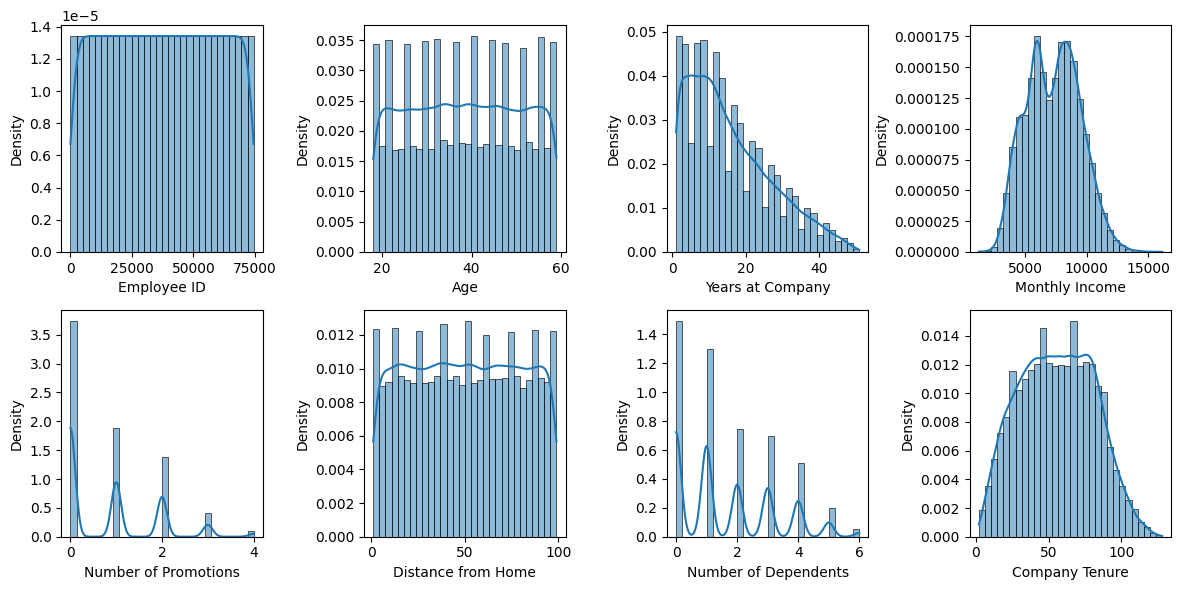

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(numerical_feature):
    sns.histplot(data[col],kde=True,stat='density',bins=30,ax=ax[i])

plt.tight_layout()
plt.show()

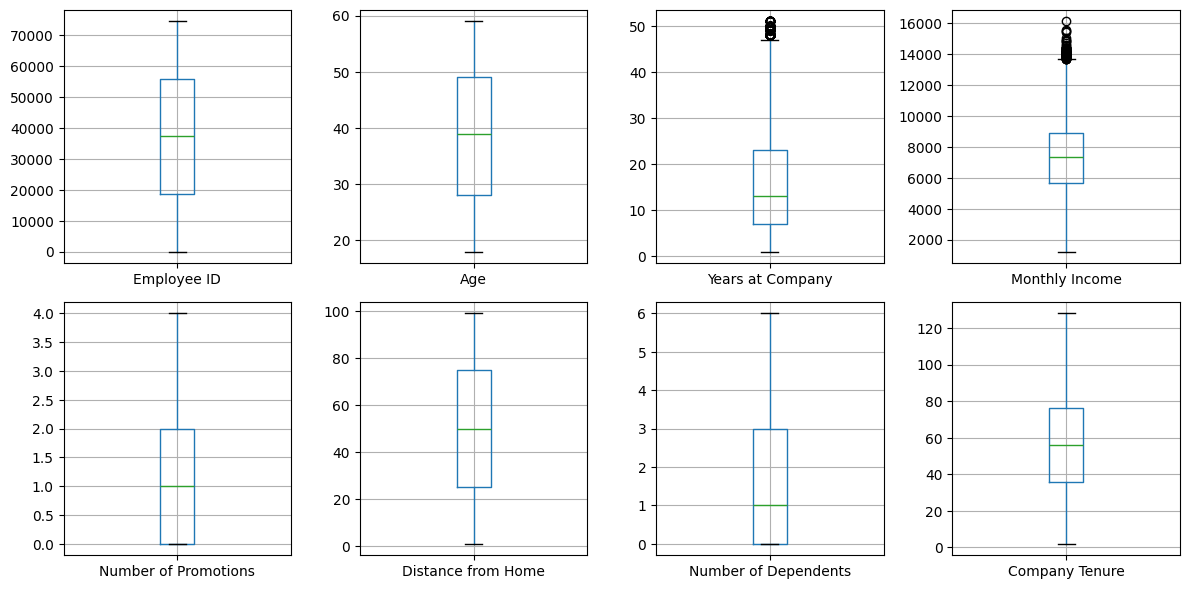

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(numerical_feature):
    data.boxplot(col, ax=ax[i])

plt.tight_layout()
plt.show()

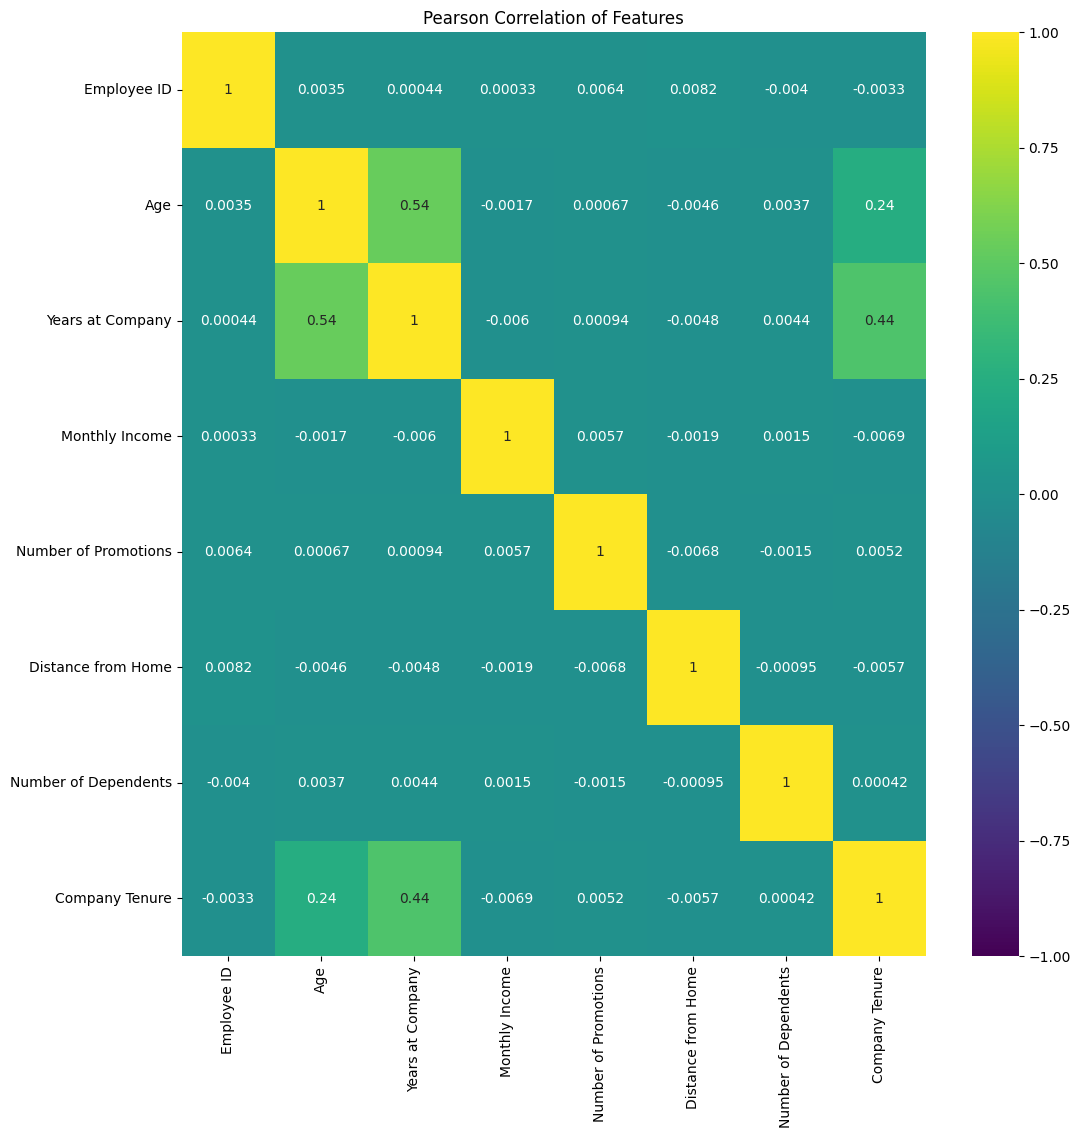

In [14]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', size=12)
ax = sns.heatmap(data[numerical_feature].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

<a id='categorical_features'></a>
### 4.4.2. Categorical Features

*Analysis of categorical features*

[...goto toc](#toc)

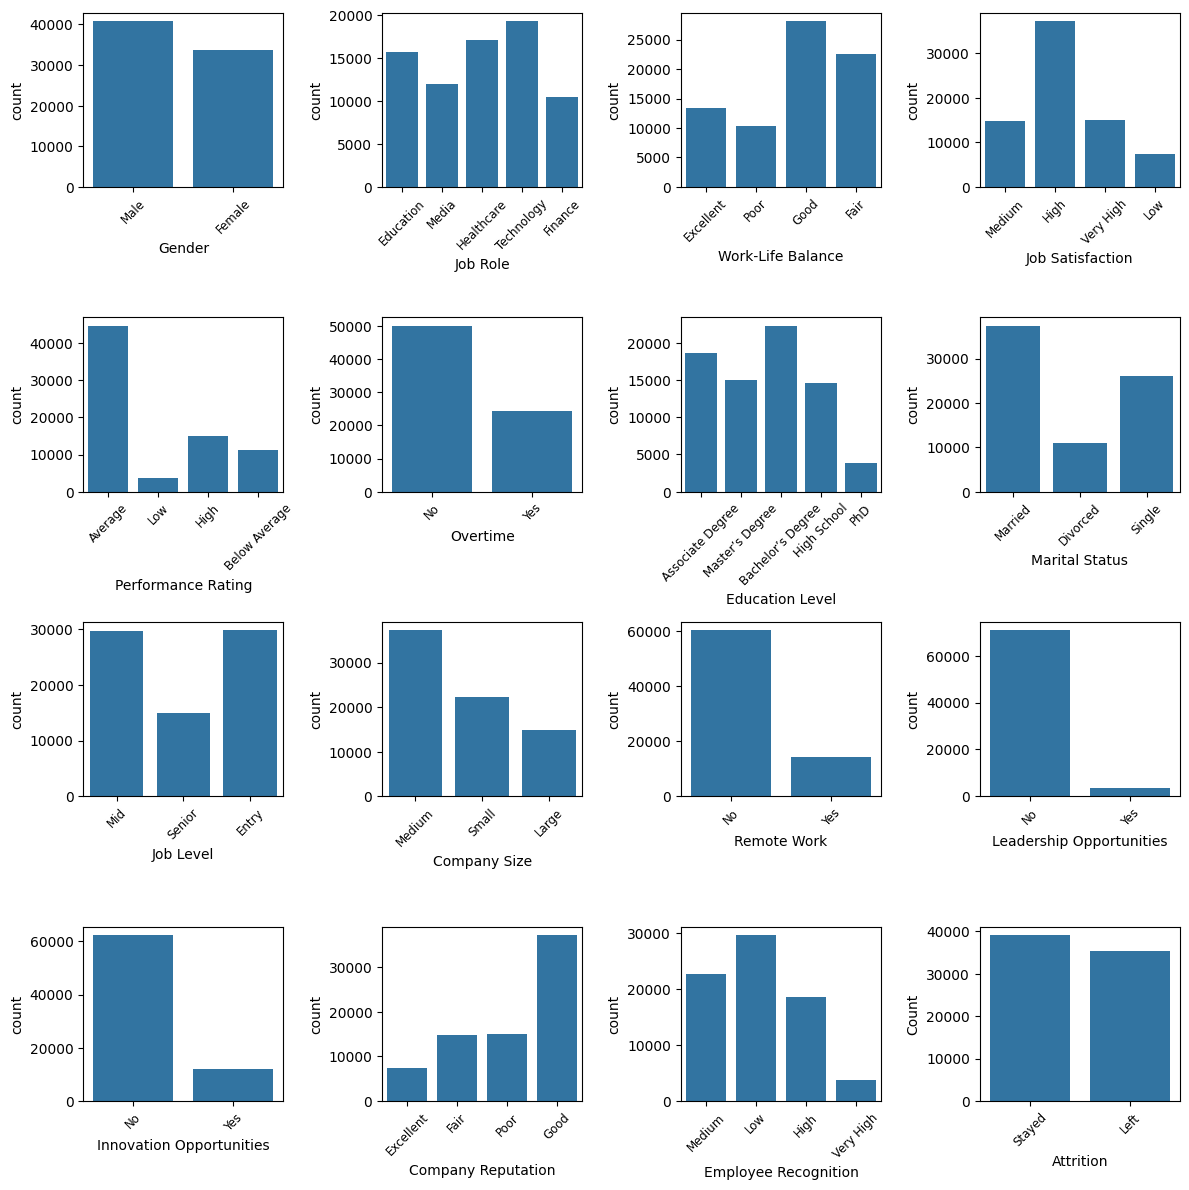

In [15]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(categorical_feature):
    sns.countplot(x=col, data=data, ax=ax[i])
    plt.ylabel('Count')
    ax[i].tick_params(axis='x', rotation=45, labelsize=8.5)

plt.tight_layout()
plt.show()


<a id='report'></a>
### 4.2.3. Analysis Report

[...goto toc](#toc)


<hr style="border:1.2px solid gray"> </hr>
<h3><center><u>Analysis Report</u></center></h3>
<hr style="border:1.2px solid gray"> </hr>

| Number of Instances | Number of Attributes | Numeric Features | Categorical Features | Target Feature | Missing Values |
| :-: | :-: | :-: | :-: | :-: | :-: |
| 74498  | 24 | 8 | 16  | Attrition | Null |


<h4><center><u>Exploratory Data Analysis</u></center></h4>
<hr>

#### Numeric Features 

- Age Distribution: The average age of employees is 38 years, with the youngest being 18 and the oldest 59. The age distribution is fairly spread out, with a standard deviation of 12 years.
- Company Tenure: Employees have an average tenure of 15.5 years at the company, but the distribution is wide (standard deviation of 11 years), suggesting a mix of newer and long-term employees.
- Dependents: Most employees (75%) have 3 or fewer dependents, while a few have up to 6.
- Monthly Income: The average monthly income is 7287.31, with a wide range from 1226 to 15063, indicating significant income disparities among employees.
- Distance from Home: The average distance from home is 49.93, with values ranging from 1 to 99, suggesting varying commute times for employees.
  
<hr>

#### Categorical Features

- Gender Imbalance: There are more male employees (8087) than female employees (6813) in the dataset.
- Remote Work: The majority of employees (12061) do not work remotely, while a smaller portion (2839) do.
- Attrition Rate: The dataset is balanced in terms of attrition, with 7868 employees staying and 7032 leaving.
- Job Role Distribution: The most common job roles are Technology (3815), Healthcare (3432), and Education (3168), while Media (2422) and Finance (2063) have fewer employees.
- Job Level Distribution: The majority of employees are in Mid (5925) or Entry (5913) level positions, with fewer in Senior (3062) roles.


<a id='data_transformation'></a>
## 4.3. Data Transformation

[...goto toc](#toc)



In [35]:
#Ordinaryencoding
ordinal_mapping={'Work-Life Balance': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Job Satisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Performance Rating': {'Low': 1, 'Below Average': 2, 'Average': 3, 'High': 4},
    'Education Level': {'High School': 1, 'Associate Degree': 2, 'Bachelor’s Degree': 3, 'Master’s Degree': 4, 'PhD': 5},
    'Job Level': {'Entry': 1, 'Mid': 2, 'Senior': 3},
    'Company Reputation': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Employee Recognition': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Company Size' : {'Small': 1, 'Medium': 2, 'Large': 3}
                }


In [36]:
for col, mapping in ordinal_mapping.items():
    data[col] = data[col].map(mapping)
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,4,2,3,2,...,0,2,2,89,No,No,No,4,2,Stayed
1,64756,59,Female,4,Media,5534,1,3,1,3,...,3,2,2,21,No,No,No,2,1,Stayed
2,30257,24,Female,10,Healthcare,8159,3,3,1,0,...,3,2,2,74,No,No,No,1,1,Stayed
3,65791,36,Female,7,Education,3989,3,3,4,1,...,2,2,1,50,Yes,No,No,3,2,Stayed
4,65026,56,Male,41,Education,4821,2,4,3,0,...,0,3,2,68,No,No,No,2,2,Stayed


In [37]:
binary_columns = ['Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Attrition', 'Overtime', 'Gender']

binary_mapping = {'No': 0, 'Yes': 1, 'Stayed': 0, 'Left': 1, 'Male': 0, 'Female': 1}

for col in binary_columns:
    data[col] = data[col].map(binary_mapping)
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,0,19,Education,5390,4,2,3,2,...,0,2,2,89,0,0,0,4,2,0
1,64756,59,1,4,Media,5534,1,3,1,3,...,3,2,2,21,0,0,0,2,1,0
2,30257,24,1,10,Healthcare,8159,3,3,1,0,...,3,2,2,74,0,0,0,1,1,0
3,65791,36,1,7,Education,3989,3,3,4,1,...,2,2,1,50,1,0,0,3,2,0
4,65026,56,0,41,Education,4821,2,4,3,0,...,0,3,2,68,0,0,0,2,2,0


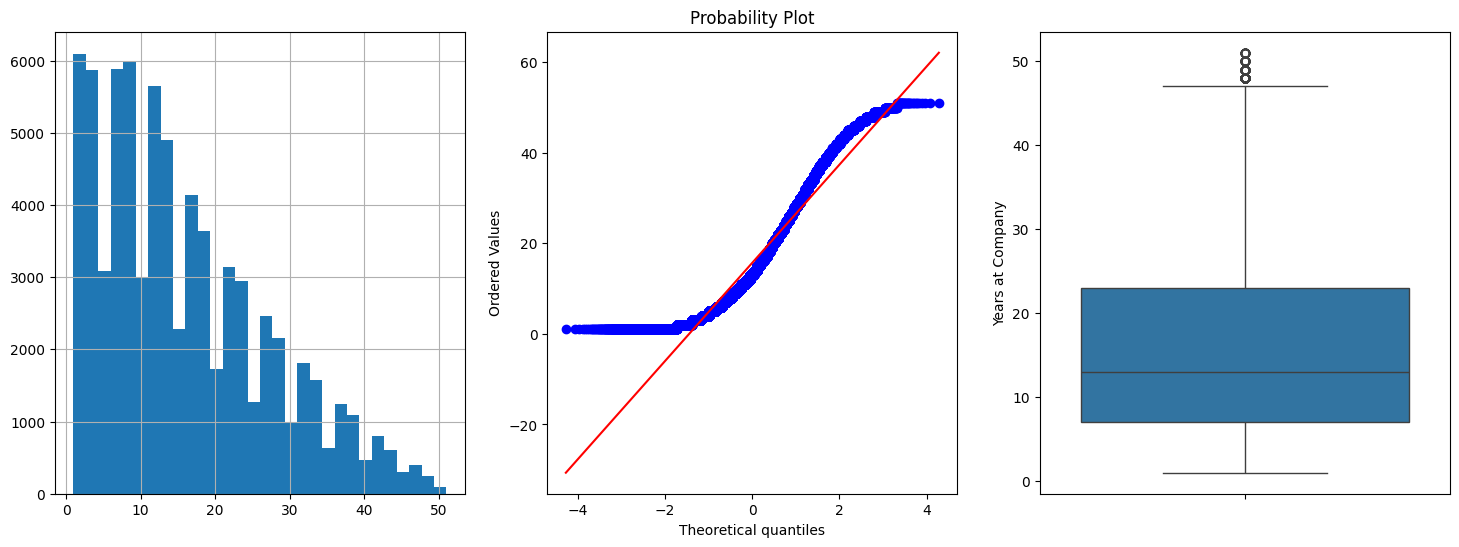

In [12]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.subplot(1, 3, 3) 
    sns.boxplot(y=df[variable]) 


    plt.show()
    
diagnostic_plots(data,'Years at Company')

In [38]:
data['Years at Company']=np.log(data['Years at Company'])

In [39]:
data['Years at Company']

0        2.944439
1        1.386294
2        2.302585
3        1.945910
4        3.713572
           ...   
74493    3.737670
74494    2.708050
74495    1.609438
74496    1.386294
74497    3.871201
Name: Years at Company, Length: 74498, dtype: float64

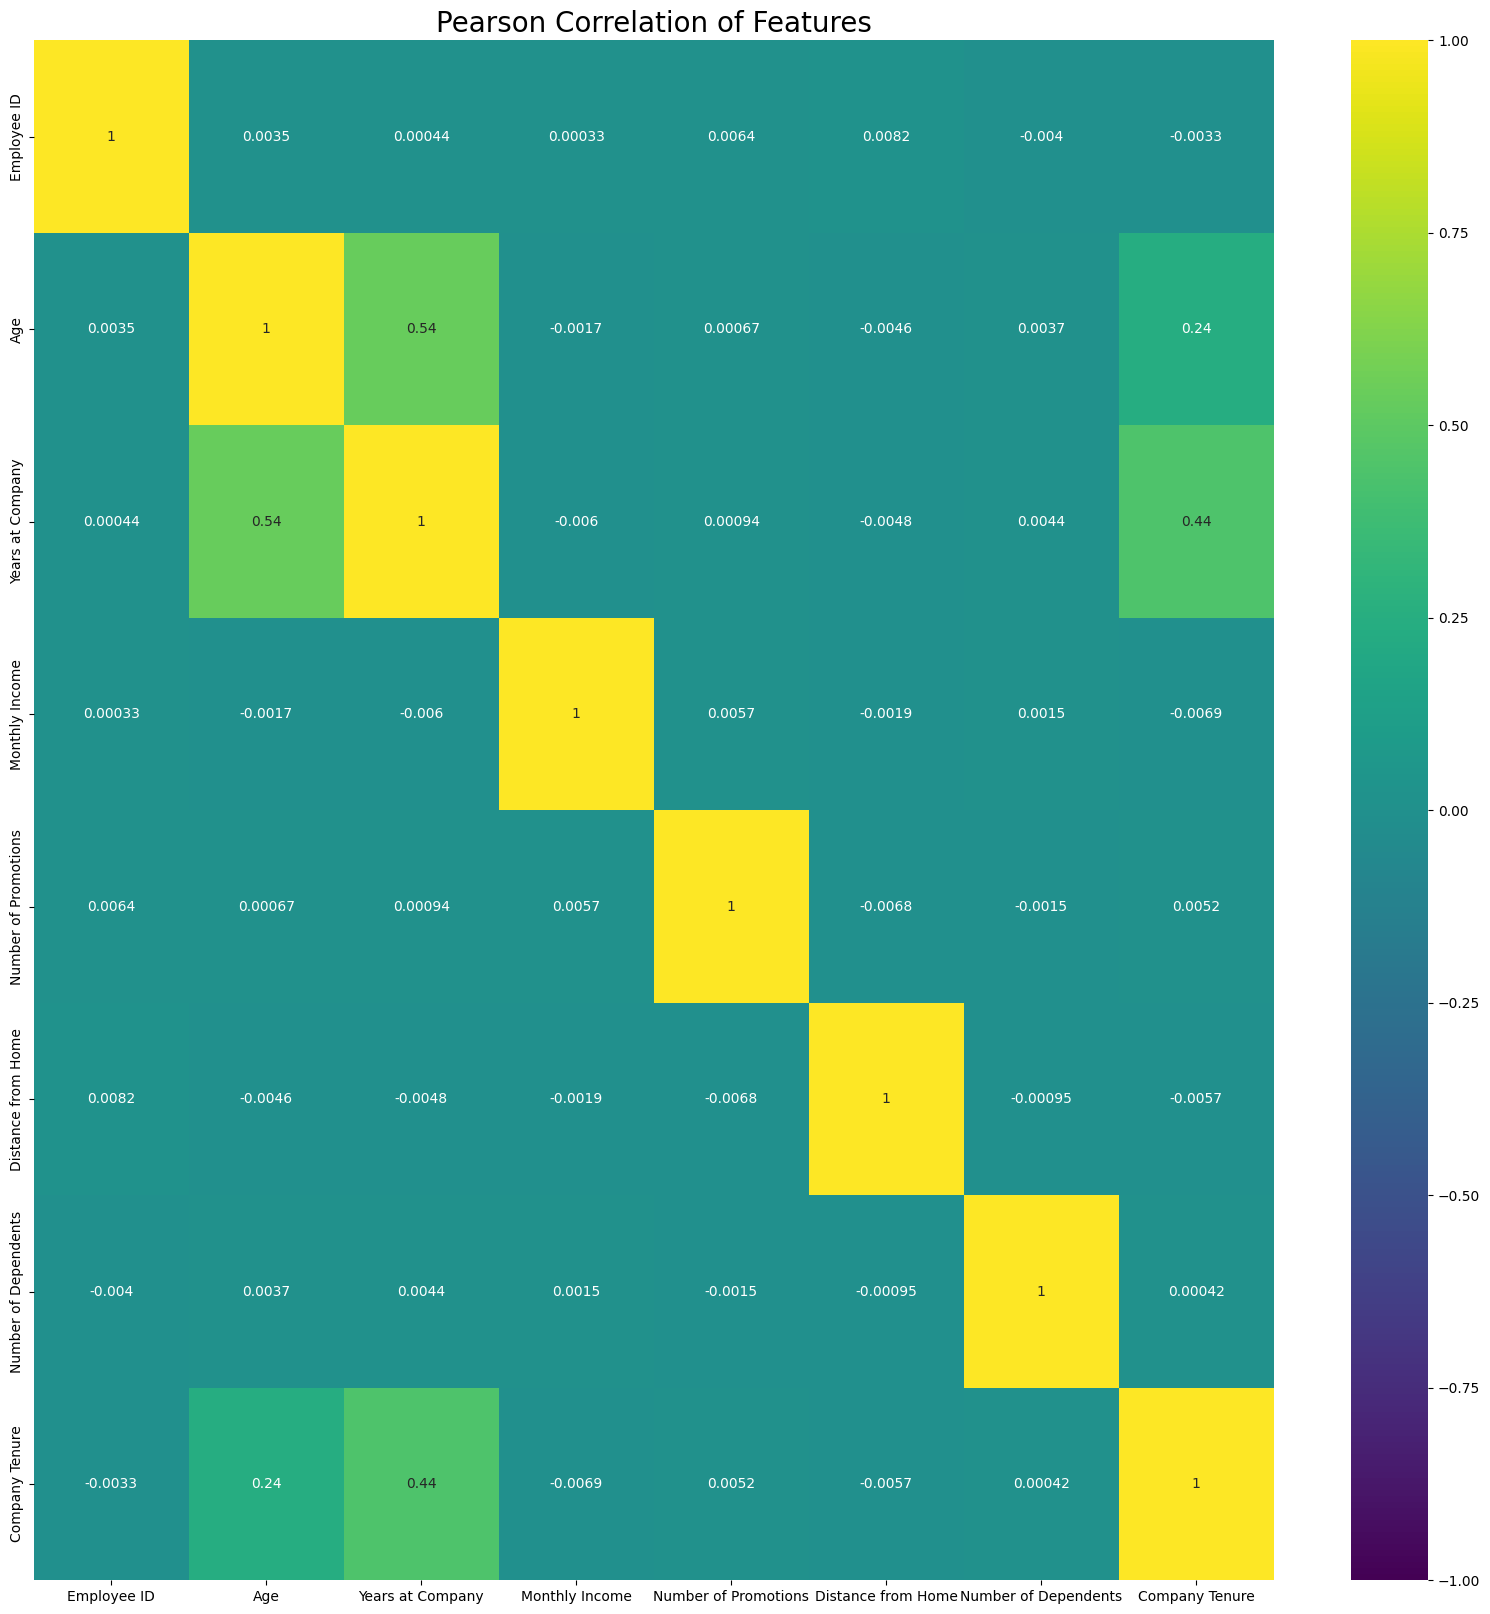

In [40]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size=20)
ax = sns.heatmap(emp_data[numerical_feature].corr(), cmap=colormap, annot=True, vmin=-1, vmax=1)
plt.show()

In [41]:
data['Job Role'].unique()

array(['Education', 'Media', 'Healthcare', 'Technology', 'Finance'],
      dtype=object)

In [42]:
data['Marital Status'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [43]:
data=data.drop(columns=['Employee ID'])

<a id='split_the_dataset'></a>
### 4.3.1. Split dataset

We will be splitting the dataset into train and test set with **70-30** split

[...goto toc](#toc)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Attrition', axis=1), data['Attrition'], test_size=0.2, random_state=69)

X_train.shape, X_test.shape

((59598, 22), (14900, 22))

In [45]:
encoder_col=['Job Role', 'Marital Status']
ohe_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_encoded_train=pd.DataFrame(ohe_enc.fit_transform(X_train[encoder_col]))
OH_encoded_test=pd.DataFrame(ohe_enc.transform(X_test[encoder_col]))

# One-hot encoding removed index; put it back
OH_encoded_train.index=X_train.index
OH_encoded_test.index=X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(encoder_col, axis=1)
num_X_test = X_test.drop(encoder_col, axis=1)

# Add one-hot encoded columns to numerical features
feature_names = ohe_enc.get_feature_names_out(input_features=encoder_col)

# Rename columns (combined with concatenation step)
OH_X_train = pd.concat([num_X_train, OH_encoded_train.set_axis(feature_names, axis=1)], axis=1)
OH_X_test = pd.concat([num_X_test, OH_encoded_test.set_axis(feature_names, axis=1)], axis=1)



In [46]:
OH_X_train.head()

,Age,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Company Reputation,Employee Recognition,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
8947,46,1,2.833213,7727,1,4,2,0,1,9,...,2,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3307,41,0,2.197225,6023,3,2,4,0,0,53,...,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2008,51,0,3.555348,5927,3,3,3,1,1,37,...,4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24271,21,0,2.397895,6929,3,3,3,3,0,13,...,4,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
273,24,0,2.197225,8486,2,3,3,0,0,11,...,3,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<a id='normalization'></a>
### 4.3.2 Normalization

*Normalization is used to scale the data of an attribute so that it falls in a smaller range, such as -1.0 to 1.0 or 0.0 to 1.0. It is generally useful for classification algorithms.*

We will use *Standard Scaler* to perform normalization.

[...goto toc](#toc)


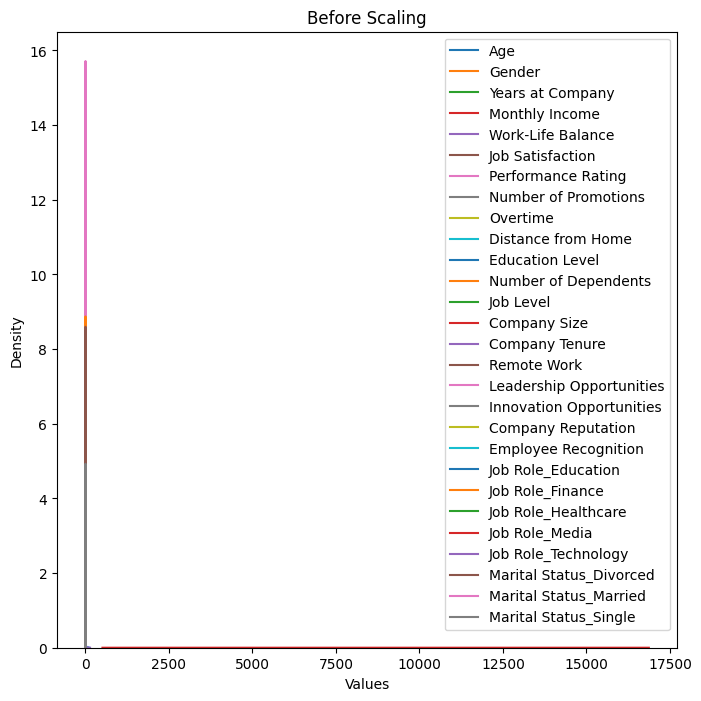

In [47]:
#Feature Scaling

plt.figure(figsize=(8, 8))
plt.title('Before Scaling')
plt.xlabel('Values')
for col in OH_X_train.columns:
    sns.kdeplot(OH_X_train[col], label=col)
plt.legend()
plt.show()

In [48]:
scaler = StandardScaler()

for col in OH_X_train.columns:
    OH_X_train[col] = scaler.fit_transform(OH_X_train[[col]])
    OH_X_test[col] = scaler.transform(OH_X_test[[col]])

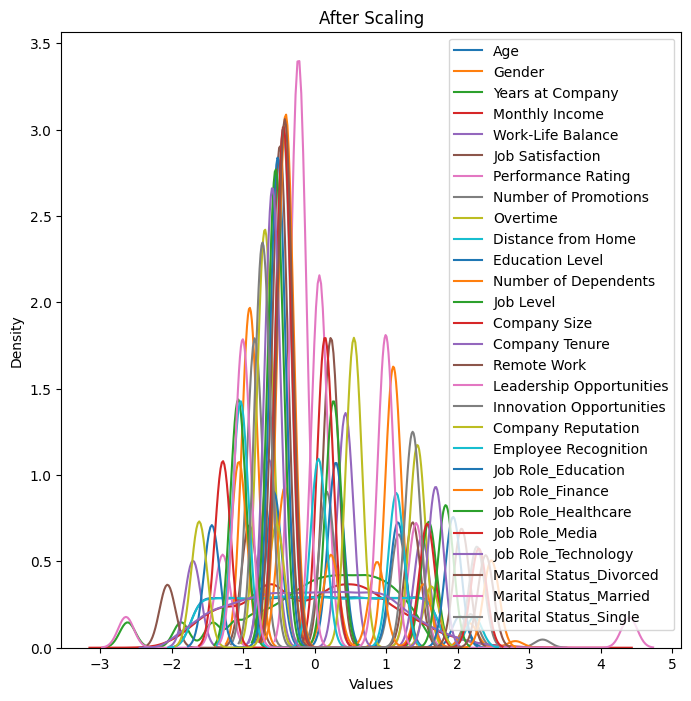

In [49]:
plt.figure(figsize=(8, 8))
plt.title('After Scaling')
plt.xlabel('Values')
for col in OH_X_train.columns:
    sns.kdeplot(OH_X_train[col], label=col)
plt.legend()
plt.show()

In [50]:
OH_X_train.head()

,Age,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Company Reputation,Employee Recognition,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
8947,0.616284,1.099606,0.446598,0.196950,-1.702277,1.369378,-1.286899,-0.837451,1.436117,-1.436011,...,-0.533662,1.141595,-0.516634,-0.404914,-0.545952,-0.436090,1.691220,2.390188,-1.006836,-0.729980
3307,0.202982,-0.909417,-0.240958,-0.592952,0.430216,-0.916165,1.417542,-0.837451,-0.696322,0.106297,...,1.630471,0.052466,-0.516634,-0.404914,-0.545952,2.293103,-0.591289,-0.418377,-1.006836,1.369901
2008,1.029586,-0.909417,1.227284,-0.637454,0.430216,0.226606,0.065322,0.168381,1.436117,-0.454542,...,1.630471,-1.036663,-0.516634,-0.404914,-0.545952,2.293103,-0.591289,-0.418377,-1.006836,1.369901
24271,-1.450225,-0.909417,-0.024016,-0.172969,0.430216,0.226606,0.065322,2.180047,-0.696322,-1.295801,...,1.630471,1.141595,-0.516634,-0.404914,-0.545952,-0.436090,1.691220,-0.418377,0.993211,-0.729980
273,-1.202244,-0.909417,-0.240958,0.548791,-0.636030,0.226606,0.065322,-0.837451,-0.696322,-1.365906,...,0.548404,0.052466,-0.516634,-0.404914,-0.545952,-0.436090,1.691220,-0.418377,-1.006836,1.369901


<a id='model_development'></a>
## 5. Model Development

We will be training different classification model and choose the one with best performance

[...goto toc](#toc)


<a id="random_forest"> </a>
### 5.1. Random Forest

[...goto toc](#toc)

In [51]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(OH_X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [52]:
y_pred_random=classifier.predict(OH_X_test)

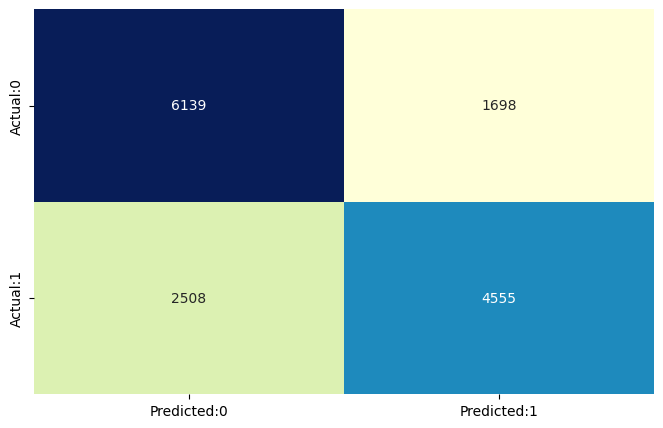

In [53]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_random)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [54]:
# Generate classification report

# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_random)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      7837
           1       0.73      0.64      0.68      7063

    accuracy                           0.72     14900
   macro avg       0.72      0.71      0.71     14900
weighted avg       0.72      0.72      0.72     14900



In [55]:
col_for_tablee=['Model','Precision','Recall Score','Accuracy Score','f1-score']
result_tabulation=pd.DataFrame(columns=col_for_tablee)

In [56]:
random_forest_metrics = pd.DataFrame({
    'Model': ["Random Forest"],
    'Precision': [metrics.precision_score(y_test, y_pred_random, average="macro")],
    'Recall Score': [metrics.recall_score(y_test, y_pred_random, average="macro")],
    'Accuracy Score': [metrics.accuracy_score(y_test, y_pred_random)],
    'f1-score': [metrics.f1_score(y_test, y_pred_random, average="macro")]
})



# appending our result table
result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index=True)

# view the result table
result_tabulation

,Model,Precision,Recall Score,Accuracy Score,f1-score
0,Random Forest,0.719204,0.714123,0.717718,0.714491


<a id="Logistic"> </a>
## 5.2 Logistic Regression

[...goto toc](#toc)

In [57]:
# Fitting LogisticRegression to the Training set

log_reg = LogisticRegression(random_state=69)
log_reg.fit(OH_X_train, y_train)

y_pred_log = log_reg.predict(OH_X_test)

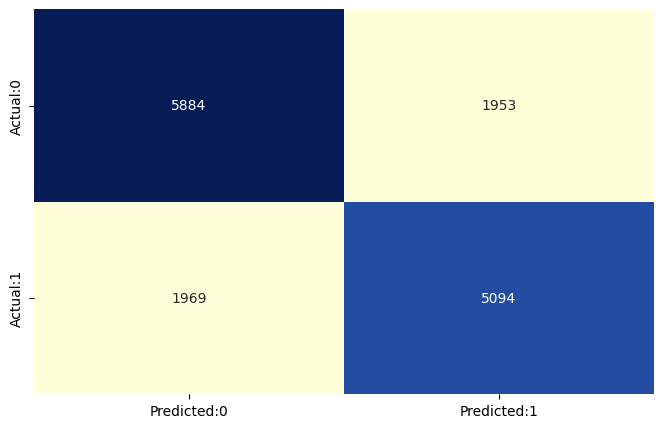

In [58]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [59]:
logit_regre_metric = pd.DataFrame({
    'Model': ["Logistic Regression"],
    'Precision': [metrics.precision_score(y_test, y_pred_log, average="macro")],
    'Recall Score': [metrics.recall_score(y_test, y_pred_log, average="macro")],
    'Accuracy Score': [metrics.accuracy_score(y_test, y_pred_log)],
    'f1-score': [metrics.f1_score(y_test, y_pred_log, average="macro")]
})



# appending our result table
result_tabulation = pd.concat([result_tabulation, logit_regre_metric], ignore_index=True)

# view the result table
result_tabulation

,Model,Precision,Recall Score,Accuracy Score,f1-score
0,Random Forest,0.719204,0.714123,0.717718,0.714491
1,Logistic Regression,0.736064,0.736010,0.736779,0.736036


<a id="ADA"> </a>
## 5.3 Ada Boosting

We will be performing hyperparameter tuning

[...goto toc](#toc)

In [60]:
adb = AdaBoostClassifier(random_state=69)
adb.fit(OH_X_train, y_train)

y_pred_adb = adb.predict(OH_X_test)

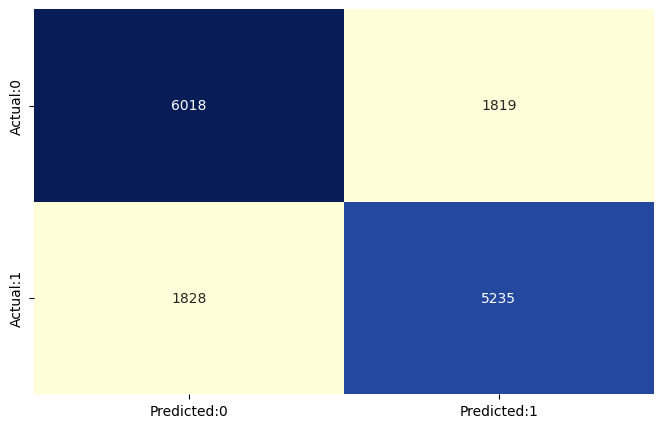

In [61]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_adb)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [62]:
ada_metric = pd.DataFrame({
    'Model': ["AdaBoost Classifier"],
    'Precision': [metrics.precision_score(y_test, y_pred_adb, average="macro")],
    'Recall Score': [metrics.recall_score(y_test, y_pred_adb, average="macro")],
    'Accuracy Score': [metrics.accuracy_score(y_test, y_pred_adb)],
    'f1-score': [metrics.f1_score(y_test, y_pred_adb, average="macro")]
})



# appending our result table
result_tabulation = pd.concat([result_tabulation, ada_metric], ignore_index=True)


<a id="model_cmp"> </a>
## 6. Model Comparision

[...goto toc](#toc)

In [63]:
result_tabulation

,Model,Precision,Recall Score,Accuracy Score,f1-score
0,Random Forest,0.719204,0.714123,0.717718,0.714491
1,Logistic Regression,0.736064,0.736010,0.736779,0.736036
2,AdaBoost Classifier,0.754574,0.754541,0.755235,0.754557


**Note: We can see that AdaBoost Classifier Method has outperformed.**

In [64]:
best_model = adb

### Save the model

In [65]:
pickle.dump(best_model, open("employee_attrition.sav", "wb"))

<a id="conclusion"> </a>

[...goto toc](#toc)



<hr style="border:1.2px solid gray"> </hr>
<h3><center><u>Conclusion</u></center></h3>
<hr style="border:1.2px solid gray"> </hr>

During the analysis the given problem of predicting the attrition we found that the problem is a binary classiffication problem and the dataset given is balanced with respect different categories of target feature (attrition).

We built different classifier for the given problem like ADA Boosting, Logistic Regression, Random Forest but **ADA Boosting** outperformed other classifiers with test accuracy of **75.5** and a f1-score of **75.4**. 


<hr>
<h4><center>Best Model</center></h4>
<hr>

| Model | Precision Score | Recall Score | Accuracy Score | f1-score |
| :-: | :-: | :-: | :-: | :-: |
| ADA Boosting | 0.754574 | 0.754541 | 0.755235  | 0.754557 |

<hr>